## Data Exploration

In [1]:
import boto3
import pandas as pd
import numpy as np

s3 = boto3.resource('s3')
bucket_name = 'evan-callaghan-bucket'
bucket = s3.Bucket(bucket_name)

file_key = 'Kaggle-Spine-Fracture-Detection/train.csv'
file_key2 = 'Kaggle-Spine-Fracture-Detection/train_bounding_boxes.csv'

bucket_object = bucket.Object(file_key)
bucket_object2 = bucket.Object(file_key2)

file_object = bucket_object.get()
file_object2 = bucket_object2.get()

file_content_stream = file_object.get('Body')
file_content_stream2 = file_object2.get('Body')

## Reading the data
train = pd.read_csv(file_content_stream)
train_boxes = pd.read_csv(file_content_stream2)

In [2]:
train.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0


In [3]:
train.shape

(2019, 9)

In [4]:
train.dropna().shape

(2019, 9)

In [5]:
train['patient_overall'].value_counts()

0    1058
1     961
Name: patient_overall, dtype: int64

In [6]:
cols = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

for i in range(0, len(cols)):
    print('Column:', cols[i])
    print(train[cols[i]].value_counts())
    print()

Column: C1
0    1873
1     146
Name: C1, dtype: int64

Column: C2
0    1734
1     285
Name: C2, dtype: int64

Column: C3
0    1946
1      73
Name: C3, dtype: int64

Column: C4
0    1911
1     108
Name: C4, dtype: int64

Column: C5
0    1857
1     162
Name: C5, dtype: int64

Column: C6
0    1742
1     277
Name: C6, dtype: int64

Column: C7
0    1626
1     393
Name: C7, dtype: int64



In [7]:
train_boxes.head()

,StudyInstanceUID,x,y,width,height,slice_number
0,1.2.826.0.1.3680043.10051,219.27715,216.71419,17.30440,20.38517,133
1,1.2.826.0.1.3680043.10051,221.56460,216.71419,17.87844,25.24362,134
2,1.2.826.0.1.3680043.10051,216.82151,221.62546,27.00959,26.37454,135
3,1.2.826.0.1.3680043.10051,214.49455,215.48637,27.92726,37.51363,136
4,1.2.826.0.1.3680043.10051,214.00000,215.48637,27.00000,43.51363,137


In [8]:
train_boxes.shape

(7217, 6)

## Learning about DICOM files

In [ ]:
pip install pydicom

In [12]:
import pydicom as dicom
from glob import glob
import matplotlib.pylab as plt

Matplotlib is building the font cache; this may take a moment.


In [17]:
train_images = glob('Test_Images/*')

In [18]:
train_images

['Test_Images/1.dcm',
 'Test_Images/4.dcm',
 'Test_Images/6.dcm',
 'Test_Images/2.dcm',
 'Test_Images/7.dcm',
 'Test_Images/3.dcm',
 'Test_Images/10.dcm',
 'Test_Images/8.dcm',
 'Test_Images/9.dcm',
 'Test_Images/5.dcm']

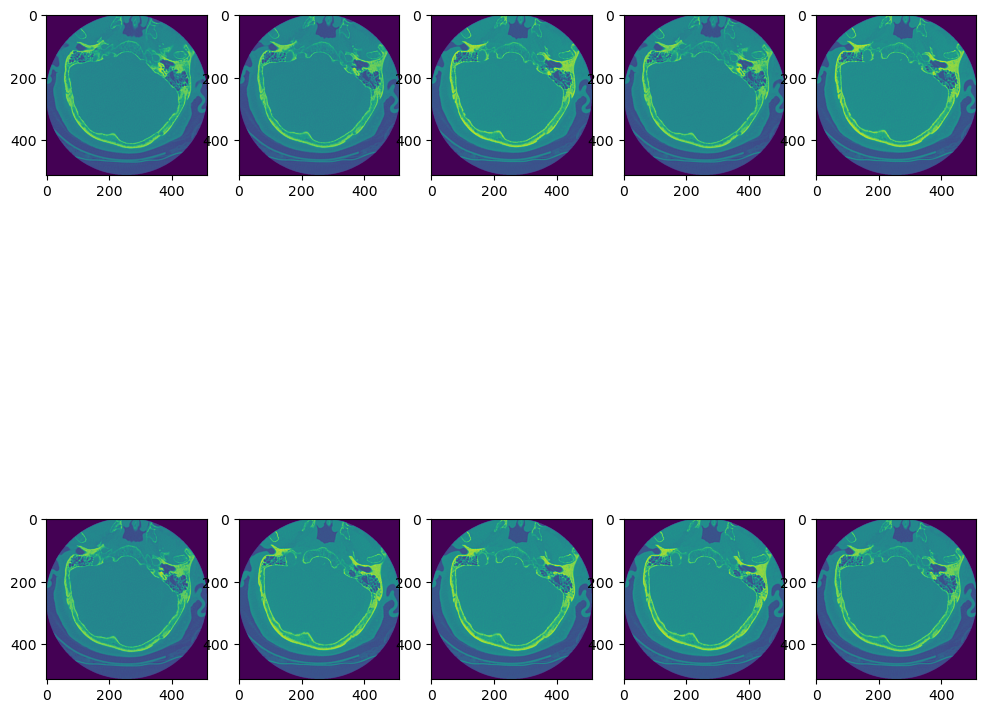

In [20]:
plt.style.use('default')
fig, axes = plt.subplots(2,5, figsize=(12,12))
train_images
for i, ax in enumerate(axes.reshape(-1)):
    img_path = train_images[i]
    img = dicom.dcmread(img_path)  
    ax.imshow(img.pixel_array)
plt.show()

In [10]:
train[train['StudyInstanceUID'] == '1.2.826.0.1.3680043.10606']

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
699,1.2.826.0.1.3680043.10606,1,0,0,0,0,0,0,1
